# Supermarket sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('supermarket_sales - Sheet.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

In [7]:
df['gross margin percentage'].unique()

array([4.76190476])

In [8]:
df = df.drop(['gross margin percentage'], axis = 1)

In [9]:
df.head(7)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,20.6520,5.8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 101.7+ KB


# Data visualistion

##### Below graph shows count of females and males is almost same

In [11]:
print(df.shape)
df['Gender'].value_counts()

(1000, 13)


Female    501
Male      499
Name: Gender, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

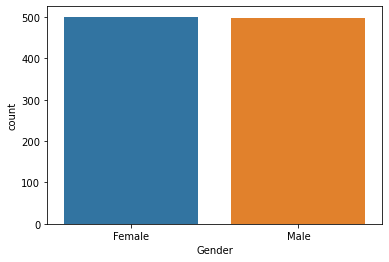

In [12]:
sns.countplot('Gender', data = df)

##### Creating dummies for Gender column for getting numeric data for seaborn bar plot

In [13]:
gender_dummies = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


##### joining original data frame (df) with gender dummies data frame(gender_dummies)

In [14]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


##### creating dummies for city column

In [15]:
city_dummies = pd.get_dummies(df['City'])
city_dummies.head()

,Mandalay,Naypyitaw,Yangon
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [16]:
customertype_dummies = pd.get_dummies(df['Customer type'])
customertype_dummies

,Member,Normal
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
995,0,1
996,0,1
997,1,0
998,0,1


In [17]:
productline_dummies = pd.get_dummies(df['Product line'])
productline_dummies.head()

,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,0,0,1


In [18]:
payment_dummies = pd.get_dummies(df['Payment'])
payment_dummies.head()

,Cash,Credit card,Ewallet
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [19]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1


#### joining original data frame (df) with city dummies data frame(city_dummies)

In [20]:
df = pd.concat([df, city_dummies], axis = 1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male,Mandalay,Naypyitaw,Yangon
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0,0,0,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0,0,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1,0,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1,0,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1,0,0,1


<AxesSubplot:xlabel='Product line', ylabel='Female'>

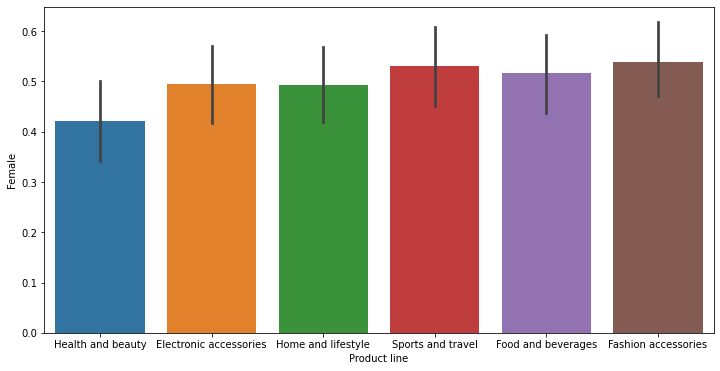

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df)

<AxesSubplot:xlabel='Product line', ylabel='Male'>

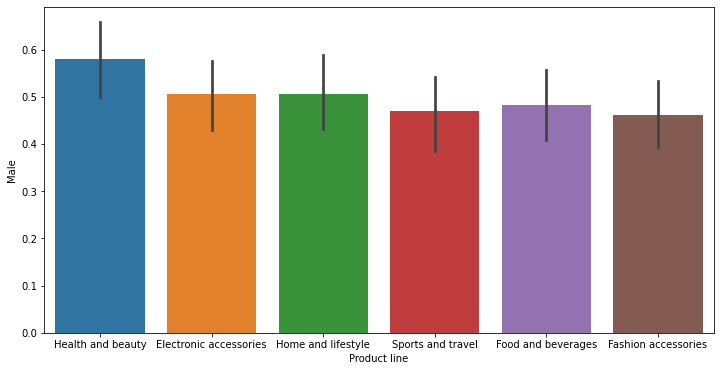

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Male', data = df)

# Plotting customers per city

In [23]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
Yangon,340
Mandalay,332
Naypyitaw,328


<AxesSubplot:ylabel='City'>

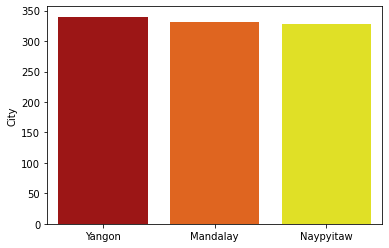

In [24]:
sns.barplot(x = place_df.index ,y = place_df['City'], palette = 'hot')

# Plotting different payment methods count

In [25]:
payment_df = pd.DataFrame(df['Payment'].value_counts())
payment_df

,Payment
Ewallet,345
Cash,344
Credit card,311


<AxesSubplot:ylabel='Payment'>

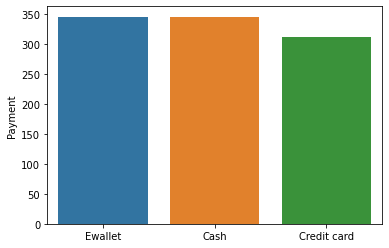

In [26]:
sns.barplot(x =payment_df.index , y = payment_df.Payment)

### Getting Gross Income Plot for each product line

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

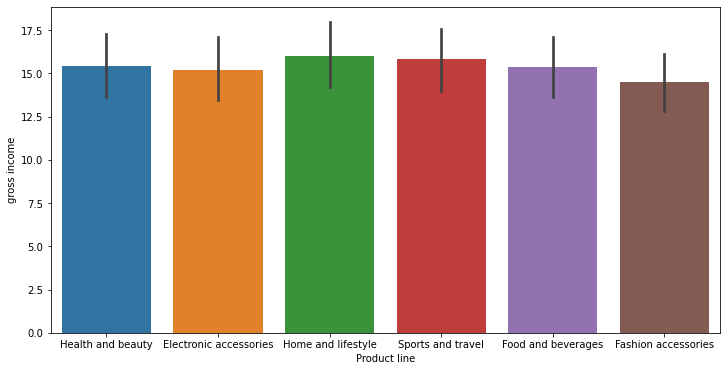

In [27]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['Product line'], y = df['gross income'])

### Getting Rating Plot for each product line

([<matplotlib.axis.XTick at 0x1b88a851640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

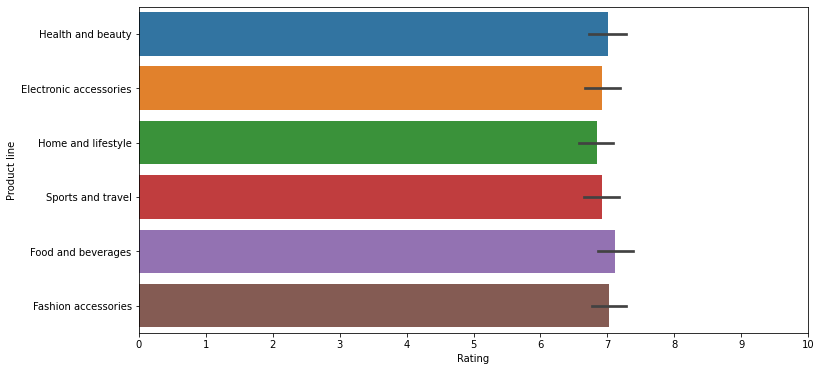

In [28]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

#### Total bill in each product line

<AxesSubplot:xlabel='Total', ylabel='Product line'>

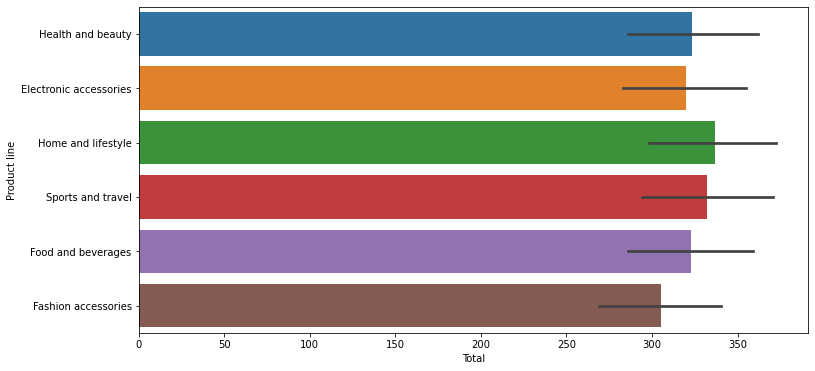

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'], y = df['Product line'])

### Exploring Quantity Column

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickets'

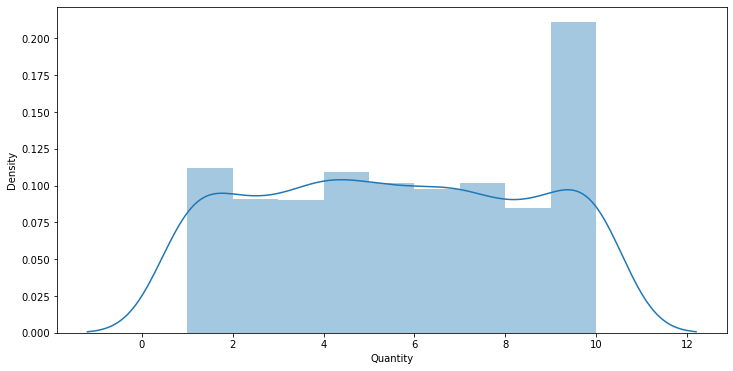

In [30]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xtickets(xdata)

In [31]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,Quantity
10,119
1,112
4,109
5,102
7,102
6,98
9,92
2,91
3,90
8,85


<AxesSubplot:ylabel='Quantity'>

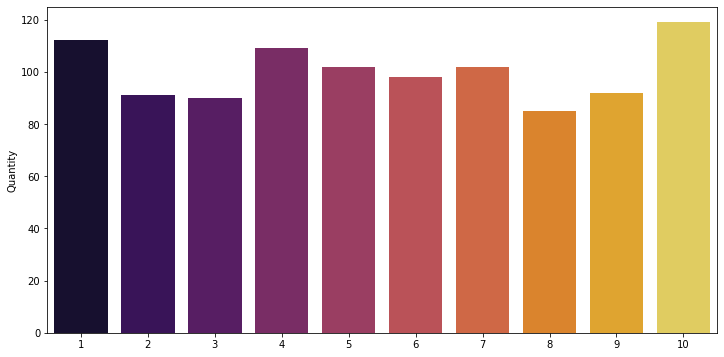

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(x = quantity_df.index, y = quantity_df['Quantity'], palette = 'inferno')

### Plotting heatmap to check if any correlation between columns

<AxesSubplot:>

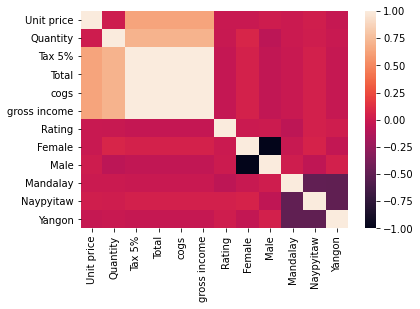

In [33]:
sns.heatmap(df.corr())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  Female         1000 non-null   uint8  
 14  Male           1000 non-null   uint8  
 15  Mandalay       1000 non-null   uint8  
 16  Naypyitaw      1000 non-null   uint8  
 17  Yangon         1000 non-null   uint8  
dtypes: float6

# Train test split

In [37]:
x = df[['Total', 'Rating', 'Unit price', 'Tax 5%']]
y = df['Quantity']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Training the Algorithm

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
x.columns

Index(['Total', 'Rating', 'Unit price', 'Tax 5%'], dtype='object')

In [44]:
lr.coef_

array([ 0.0139791 ,  0.02574784, -0.08068638,  0.00066567])

In [45]:
lr.intercept_

5.25502579305898

# Testing the Algorithm

In [46]:
predictions = lr.predict(x_test)
predictions

array([ 8.05886838,  4.83405203, 12.02116039,  4.8529735 ,  4.991174  ,
        1.80880328,  4.47269169,  4.92509523,  5.82296618,  3.74726288,
        3.95464763,  8.4263206 ,  6.56952813,  5.72470818,  5.96640289,
        5.15596912,  4.93648153,  3.88221539,  3.66636125,  4.156419  ,
        0.63173544,  0.60860877,  5.26408008,  7.12046424, -0.37166982,
       -0.65854431,  8.29285809, 11.10847145, 11.849185  ,  6.18794323,
        1.22680038,  3.41772125, -0.11505598,  3.97982023,  2.53542361,
        2.11690753,  6.34795552,  3.34275028,  4.52812735,  5.79909297,
        5.83999071,  2.96751862,  6.50386984,  6.76784467,  7.49401502,
        3.44744661,  7.43846324,  7.04787537,  7.06657882,  3.19750712,
        4.28675815,  7.16761364,  1.01811471,  5.34818583,  6.50489853,
        6.52666773,  4.74154439,  3.99198049,  0.79448297,  3.69805544,
        3.78259906,  4.84147667,  0.44345616,  9.01481139,  7.4375266 ,
        4.84750944, 10.55825603,  4.65248708,  6.56888954,  5.36

# Model Evaluation¶

Text(0, 0.5, 'Predictions')

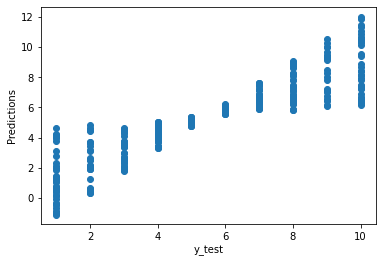

In [47]:
plt.scatter(y_test, predictions)
plt.xlabel("y_test") #Actual output
plt.ylabel("Predictions") #ML Predictions

In [48]:
from sklearn import metrics

In [49]:
metrics.mean_absolute_error(y_test, predictions)

0.9143074998980766

In [50]:
metrics.mean_squared_error(y_test, predictions)

1.5839585952827164

In [51]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.2585541685929598

In [52]:
import pickle

In [53]:
pickle.dump(lr, open('lr Model.pkl', 'wb'))

In [54]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Female,Male,Mandalay,Naypyitaw,Yangon
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,1,0,0,0,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1,0,0,1,0
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,0,1,0,0,1
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,0,1,0,0,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0,1,0,0,1


In [55]:
loadedModel = pickle.load(open('lr model.pkl', 'rb'))

In [56]:
loadedModel

LinearRegression()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   object 
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  Female         1000 non-null   uint8  
 14  Male           1000 non-null   uint8  
 15  Mandalay       1000 non-null   uint8  
 16  Naypyitaw      1000 non-null   uint8  
 17  Yangon         1000 non-null   uint8  
dtypes: float6

In [58]:
x

,Total,Rating,Unit price,Tax 5%
0,548.9715,9.1,74.69,26.1415
1,80.2200,9.6,15.28,3.8200
2,340.5255,7.4,46.33,16.2155
3,489.0480,8.4,58.22,23.2880
4,634.3785,5.3,86.31,30.2085
...,...,...,...,...
995,42.3675,6.2,40.35,2.0175
996,1022.4900,4.4,97.38,48.6900
997,33.4320,7.7,31.84,1.5920
998,69.1110,4.1,65.82,3.2910


In [59]:
loadedModel.predict([[42, 6, 86, 30]])[0]

-0.9224233614527186